<a href="https://colab.research.google.com/github/sauravsb99/Malayalam-Word-Prediction/blob/master/Malyalam_Language_Model_ULMFiT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!pip install sentencepiece


     |████████████████████████████████| 1.1MB 6.5MB/s 


In [21]:
!pip install fastprogress==0.1.22

  Found existing installation: fastprogress 0.2.3
    Uninstalling fastprogress-0.2.3:
      Successfully uninstalled fastprogress-0.2.3


In [3]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [5]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.5.1+cu101')

In [6]:
import multiprocessing as mp

class Foo():
    @staticmethod
    def work(self):
        pass

if __name__ == '__main__':   
    pool = mp.Pool()
    foo = Foo()
    pool.apply_async(foo.work)
    pool.close()
    pool.join()

In [ ]:
# torch.cuda.set_device(0)

In [ ]:
!pwd

/content


In [ ]:
path = Path('/home/sauravsb99/MalWorPre/nlp-for-malyalam/language-model')

In [6]:
!pip install inltk


     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 235kB 15.4MB/s 
     |████████████████████████████████| 1.2MB 19.8MB/s 
     |████████████████████████████████| 266kB 16.1MB/s 
     |████████████████████████████████| 153kB 30.7MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26309 sha256=a525233b592c038c3dd354c7047d5cad79c1cfb8d094a4e3f46d4e2e2ab728ef
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=f67b8c15eb0ae5488bebaba9aa8d24f804db0ba99bde43d41725443e605d8f96
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built typing idna-ssl
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [7]:
from inltk.tokenizer import MalyalamTokenizer

In [8]:
MalyalamTokenizer

inltk.tokenizer.MalyalamTokenizer

In [ ]:
# class MalyalamTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/malyalam_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [14]:
!cp "/content/drive/My Drive/Dataset/malyalam_lm.model" "/content/"

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str("/content/malyalam_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(10000)]

In [10]:
# 10,000 is the vocab size that we chose in sentencepiece
malyalam_vocab = Vocab(itos)

In [11]:
tokenizer = Tokenizer(tok_func=MalyalamTokenizer, lang='ml')

In [12]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import files
dataset_file_dict = files.upload()

Saving MalayalamDataset.zip to MalayalamDataset.zip


In [11]:
!cp "/content/drive/My Drive/Dataset/MalayalamDataset.zip" "/content/" 


In [12]:
# zip_path = '/content/drive/My Drive/Dataset/MalayalamDataset.zip'
# !cp “{zip_path}” .
!unzip -q MalayalamDataset.zip
# !rm MalayalamDataset.zip

In [8]:
from inltk.inltk import setup

setup('ml')

RuntimeError: ignored

We'll only do this for the first time.


In [13]:
data_lm = TextLMDataBunch.from_folder(path='/content/MalayalamDataset', tokenizer=tokenizer, vocab=malyalam_vocab)


In [14]:
data_lm.batch_size

64

In [15]:
data_lm.save()

In [16]:
data_lm.show_batch()

idx,text
0,"▁താ ലു ക്കിൽ , ▁കോട്ട പ്പ ടി ▁പഞ്ചായത്ത ിൽ ▁മൂ ന്തു ർ ▁എന്ന ▁സ്ഥല ത്തുള്ള ▁ശിവക്ഷേത്ര മാണ് ▁ന ന്ത നാർ ▁ക്ഷേത്രം . ▁ശിവ ▁പ്രതിഷ്ഠ ക്കൊപ്പം ▁ഭക്ത ന ന്ത നാ രുടെ ▁പ്രതിഷ്ഠ യും ▁ഉള്ള ▁കേരളത്തിലെ ▁അപൂർവ്വ ം ▁ക്ഷേത്ര ങ്ങളിൽ ▁ഒന്നാണ് ▁ഇത് . ▁അമ്പ തി യ ൊന്നു ▁പടി കൾ ▁കയറി വേ ണം ▁നട <unk> ▁എത്ത ാൻ . ▁മലയാളം ▁മാസം ▁ഒന്നാം തി യ തി കളിൽ ▁രാവിലെ ▁പ്രത്യേക ▁പൂജ കൾ ▁നടത്തിവരുന്നു . ▁കൂടാതെ ▁എല്ലാ"
1,▁ചെയ്തു . ▁ഗ ത്യ ന്ത ര മില്ലാതെ ▁അലി ▁മുആവിയ യുടെ ▁സൈന്യ വുമായി ▁സന്ധി ▁ചെയ്യാൻ ▁തീരുമാനിച്ചു . ▁എന്നാൽ ▁ഈ ▁തീരുമാന ം ▁അലിയുടെ ▁തന്നെ ▁അനുയായികള ിൽ ▁ചില രുടെ ▁കടുത്ത ▁എതിർപ്പ ിനി ട യാക്കി . ▁തീവ്രവാദ ികളായ ▁ഇവര ിൽ ▁ചിലർ ചേർന്ന് ▁അലി യെ ▁കൊല പ്പെടുത്തി . ▁കിട്ടിയ ▁അവസരം ▁പാ ഴ ാ ക്കാതെ ▁മുആവിയ ▁സ്വയം ▁ഖലീഫ യായി ▁അവ രോധ ിച്ചു . ▁ഖലീഫ ▁സ്ഥാന ത്തിന ർ ഹ നായ ▁അലിയുടെ ▁മൂത്ത ▁പുത്രൻ ▁ഹ സ്സ ന് ▁പെൻഷൻ
2,ത ൽ ▁അതിവേഗ പാത ▁ഉപയോഗ ് ഗ ിക്കുന്ന ▁വാഹന ങ്ങൾക്ക് ▁ചു ങ്ക ം ▁നിരക്ക ിൽ ▁ഇള വ ുകൾ ▁അനുവദിച്ച ിട്ടുണ്ട് . ▁ x x bo s ▁തോ ക്ക ുകളുടെ ▁മുന്നിൽ ▁ഘടിപ്പിക്ക ുന്ന ▁കത്തി യാണ് ▁ബ യ ണ റ്റ് ▁എന്ന റിയപ്പെടുന്നത് . ▁തോ ക്ക ിനെ ▁അടിസ്ഥാന പരമായി ▁ഒരു ▁കു ന്ത മാക്കി ▁ഉപയോഗിക്ക ാനാണ് ▁ബ യ ണ റ്റ് ▁ഘടിപ്പിക്ക ുന്നത് . ▁വെടി യു ണ്ട യുടെ ▁ദ ൗ ർ ല ഭ്യ മോ ▁തൊട്ടടുത്ത
3,ായ പ്പോൾ ▁അയാൾ ക്ക് ▁സഹ താ പ ം ▁തോന്ന ുകയും ▁ക്രമേണ ▁പ്രണയ മായി ▁മാറുകയും ▁ചെയ്തു . അ യാൾ ക്ക് ▁ഒരിക്കൽ ▁അന ധി കൃത മായി ▁ജോലി ▁ചെയ്യുന്ന ▁ അഫ്ഗാൻ കാര െ ▁പിടികൂട ാൻ ▁വന്ന ▁ഇറാനിയൻ ▁ഉദ്യോഗസ്ഥര ിൽ ▁അവളെ ▁രക്ഷിക്ക ാൻ ▁സാധിക്ക ുകയും ▁ചെയ്തു . ▁ഇ തിനുശേഷം ▁ബ റ ാൻ ▁ജോലി സ്ഥല ം ▁മാറ്റ ുകയും ▁ചെയ്തു . എന്നാൽ ▁ല തീ ഫ് ▁പല ▁സ്ഥല ങ്ങളിലും ▁അവളെ ▁അന്വേഷിച്ച ് ▁നടന്നു . ഒരു ▁പുഴ യുടെ
4,"ാണ് . ▁മുഗൾ കാല ▁കെട്ടിട ങ്ങൾ ▁അടങ്ങുന്ന ▁തെക്കുകിഴക്ക േ ▁മൂല , ▁ആർ ക്കിയ ോളജി ക്കൽ ▁സർവ േ ▁ഓഫ് ▁ഇന്ത്യയുടെ ▁കൈവശ മാണ് . ▁ഈ ▁ഭാഗം ▁സന്ദർശക ർ ക്കായി ▁തുറന്നു കൊടുത്ത ിട്ടു മുണ്ട് . ▁ 94 - ac re ▁വിസ്തൃതി യുള്ള ▁ആഗ്ര ▁കോട്ട , ▁ഏതാണ്ട് ▁അർദ്ധ വൃത്ത ാകൃതി യിലാണ് . ▁കിഴക്കു വശത്ത ് ▁അർദ്ധ വൃത്ത ത്തിന്റെ ▁ഞാ ൺ ▁ഭാഗം , ▁യമുന ാ നദി ക്ക് ▁സമാന്തര മായി ▁സ്ഥിതി ▁ചെയ്യുന്നു . ▁ഇരട്ട ഭി ത്തി"


In [17]:
len(data_lm.vocab.itos)

10000

In [ ]:
!pip install -q git+https://github.com/fastai/fastprogress --upgrade
!pip install -q git+https://github.com/fastai/fastcore --upgrade
!pip install -q git+https://github.com/fastai/fastai2 --upgrade

In [ ]:
!pip install --upgrade --user prompt_toolkit==2.0.10

     |████████████████████████████████| 348kB 2.8MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 2.0.10 which is incompatible.
ERROR: ipython 5.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 2.0.10 which is incompatible.


In [29]:
!pip uninstall fastprogress

Uninstalling fastprogress-0.2.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/fastprogress-0.2.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/fastprogress/*
Proceed (y/n)? y
  Successfully uninstalled fastprogress-0.2.3


In [18]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

A new version of the model is available.


In [19]:
gc.collect()

0

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


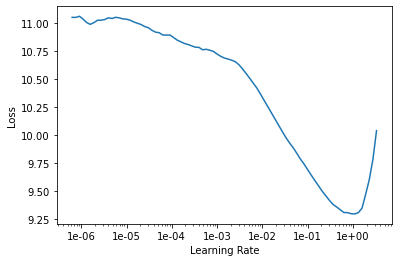

In [ ]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.320145,5.169722,0.207704,03:54


In [22]:
learn.save('first', with_opt=True)

In [23]:
learn.load('first', with_opt=True);

In [24]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.616034,4.716401,0.242920,04:53
1,4.292662,4.435427,0.272956,04:57
2,3.994890,4.039202,0.321016,04:57
3,3.547452,3.656352,0.374645,04:57
4,3.153727,3.555925,0.392381,04:57


In [26]:
learn.save('second_ml_lm', with_opt=True)

In [27]:
learn.load('second_ml_lm', with_opt=True);

In [30]:
learn.fit_one_cycle(40, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.131536,3.551069,0.393701,04:57
1,3.135180,3.543151,0.395411,04:57
2,3.222759,3.526797,0.397630,04:57
3,3.141239,3.509689,0.400824,04:58
4,3.187061,3.485843,0.404872,04:58
5,3.007848,3.460825,0.408889,04:57
6,2.989048,3.438332,0.413262,04:58
7,3.030503,3.408356,0.418677,04:58
8,2.931909,3.380073,0.423970,04:58
9,2.976166,3.353133,0.429234,04:58


In [31]:
learn.save('third_ml_lm', with_opt=True)

In [32]:
learn.load('third_ml_lm', with_opt=True);

In [33]:
TEXT = "ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി"
N_WORDS = 40
N_SENTENCES = 2

In [34]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി ക്ക് ▁നേരിട്ട് ▁ഭരണ പരി ശീല ന ത ▁അഥവാ ▁കട പ്പ ത്ര ങ്ങൾ ▁പുറപ്പെടുവിക്ക ാൻ ▁കമ്പനി ക്കു ▁കഴിഞ്ഞു . ▁കച്ചവട ം ▁എളുപ്പ ം ▁ഒ ത്തു ▁പോകുന്ന തോ ▁ആയ ▁എല്ലാ ▁വസ്തുവ ും ▁ത ിട്ട പ്പെടുത്തി യാണ് ▁സാധനങ്ങൾ ▁വാങ്ങ ുക , ▁ചെലവ ു
ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി ക്ക് ▁ഇന്ത്യൻ ▁ഭരണാധികാരി കൾ ▁നൽകിയ ▁രാജ്ഞി യാണ് ▁ഈസ്റ്റ് ▁ഇന്ത്യാ ▁കമ്പനി . ▁മുഗൾ ▁ചക്രവർത്തി യായ ▁ബഹാദൂർ ഷാ ▁സ ഫ റിന്റെ ▁ഭരണകാലത്ത് , ▁മുഗൾ ▁ചക്രവർത്തി യായ ▁ഫറൂഖ് ▁സി യാർ ▁അലി , യാർ ക്ക ൽ ▁എന്നിവർ ▁16 11 - ൽ ▁പു ത്തേ ട


In [35]:
np.exp(3.273)

26.39039188081262

In [65]:
from google.colab import files
files.download('embeddings_metadata.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [ ]:
# Generating embedding vectors for visualization

In [46]:
path

'/content/drive/My Drive/Dataset/third_ml_lm.pt'

In [47]:
defaults.device = torch.device('cpu')

In [49]:
learn = load_learner("/content/MalayalamDataset/")

In [50]:
encoder = get_model(learn.model)[0]

In [51]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([10000, 400])

In [52]:
embeddings = encoder.state_dict()['encoder.weight']

In [53]:
embeddings = np.array(embeddings)

In [54]:
embeddings[0].shape

(400,)

In [55]:
df = pd.DataFrame(embeddings)

In [56]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,-0.297892,-0.331972,0.070217,-0.155268,0.088603,0.212060,-0.081518,-0.678269,0.443123,0.481482,0.315815,-0.203421,-0.165445,0.028046,-0.272020,-0.896118,-0.405184,-0.234428,0.657030,0.186306,-0.169072,-0.209766,0.459631,0.722605,0.040651,-0.332693,-0.838987,-0.439200,-0.242361,-0.174896,0.231726,-0.585824,-0.260508,-0.375084,-0.306219,-0.306037,-0.327202,0.105402,0.198313,0.256535,...,-0.258957,-0.223616,0.377921,0.153783,-0.370866,-0.066235,-0.211417,0.063589,0.359449,0.011164,-0.782443,-0.164221,0.444226,-0.208292,-0.590227,0.866036,0.384420,0.240762,-0.086002,0.450606,-0.020360,-0.309999,-0.971045,0.073235,0.313045,-0.227954,0.270208,0.148950,0.219008,0.043542,0.045815,-0.623455,0.155058,0.254963,0.108806,-0.169915,0.552329,0.108223,0.739517,-0.409220
1,-0.160646,0.058475,0.054121,-0.071808,-0.250778,-0.340755,-0.026287,0.976310,-0.105371,-0.703556,-0.518588,0.064164,-0.382735,0.090043,0.126611,0.535767,0.438305,-0.281677,-0.848302,0.033281,-0.279764,-0.233857,-0.223170,-0.417064,-0.030521,0.032029,0.431749,-0.049039,-0.190830,-0.141212,-0.284958,-0.051619,0.713426,0.303255,0.353171,-0.302841,0.279728,0.026623,-0.570567,-0.037099,...,0.122340,0.308201,-0.369601,0.174132,-0.021707,-0.238341,0.451136,-0.034573,0.056281,-0.403181,0.387160,-0.202737,-0.209898,0.175677,0.316413,-0.190761,-0.488649,0.152949,-0.618381,-0.083623,-0.266157,-0.127658,0.305128,-0.431592,0.001313,0.458120,0.141384,0.034727,-0.068478,0.186345,0.450472,0.352687,0.505219,0.125074,0.297361,0.330581,-0.334927,0.231883,0.002418,0.043382
2,-0.160646,0.058475,0.054121,-0.071808,-0.250778,-0.340755,-0.026287,0.976310,-0.105371,-0.703556,-0.518588,0.064164,-0.382735,0.090043,0.126611,0.535767,0.438305,-0.281677,-0.848302,0.033281,-0.279764,-0.233857,-0.223170,-0.417064,-0.030521,0.032029,0.431749,-0.049039,-0.190830,-0.141212,-0.284958,-0.051619,0.713426,0.303255,0.353171,-0.302841,0.279728,0.026623,-0.570567,-0.037099,...,0.122340,0.308201,-0.369601,0.174132,-0.021707,-0.238341,0.451136,-0.034573,0.056281,-0.403181,0.387160,-0.202737,-0.209898,0.175677,0.316413,-0.190761,-0.488649,0.152949,-0.618381,-0.083623,-0.266157,-0.127658,0.305128,-0.431592,0.001313,0.458120,0.141384,0.034727,-0.068478,0.186345,0.450472,0.352687,0.505219,0.125074,0.297361,0.330581,-0.334927,0.231883,0.002418,0.043382
3,0.089373,-0.726966,0.240312,0.238689,-0.173341,0.053705,0.189028,-0.631315,0.123770,0.114347,0.014590,-0.032883,0.103078,0.351412,0.165508,0.183400,0.526711,0.193238,-0.332156,0.223156,-0.538613,-0.297137,0.505826,-0.095857,0.046667,1.441607,0.698710,0.150078,0.116360,-0.176172,-0.256836,0.312506,-0.737269,-0.003781,0.156800,0.021490,0.880053,0.072431,0.236686,-0.301657,...,0.224969,0.028987,-0.091331,0.630065,-0.429590,0.580563,0.424881,-0.164270,-0.371390,0.324348,-0.638957,0.529030,-0.141204,-1.243168,-0.202424,-0.290571,0.395240,-0.239927,0.572965,-0.287631,0.161046,0.081109,-0.050074,0.254225,0.253358,0.101367,-0.291929,0.839176,-0.634233,0.551641,0.115260,0.748270,0.173258,-0.036200,0.390018,-0.854705,-0.288600,-0.133843,0.282715,-0.127278
4,-0.033075,-0.850733,-0.047078,0.176574,0.018427,0.099038,0.085553,-0.562514,0.277020,0.244884,0.339492,-0.144493,0.117615,0.221814,-0.133400,-0.590753,-0.866454,0.318123,0.350842,0.180032,-0.079521,0.138312,0.067843,0.435829,0.049067,2.183836,0.482804,-0.026571,-0.257208,-0.165102,0.113736,-0.054586,-0.341303,0.216442,-0.041792,0.163283,0.225472,-0.189010,0.165899,-0.131240,...,0.146593,-0.159480,-0.120774,0.443102,0.159416,0.135648,-0.603677,-0.014715,0.104214,0.169010,-0.583729,0.330834,0.020506,0.060683,-0.501521,-0.034798,0.017864,0.246225,0.087756,-0.365197,0.149174,-0.027532,-0.038809,0.061676,0.253751,-0.162404,-0.041339,0.604351,-0.525800,0.540229,-0

In [57]:
df.shape

(10000, 400)

In [58]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [60]:
df2 = pd.DataFrame(itos)

In [61]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,.
4,","


In [62]:
df2.shape

(10000, 1)

In [63]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [64]:
encoder.state_dict()['encoder.weight'][1]

tensor([-1.6065e-01,  5.8475e-02,  5.4121e-02, -7.1808e-02, -2.5078e-01,
        -3.4076e-01, -2.6287e-02,  9.7631e-01, -1.0537e-01, -7.0356e-01,
        -5.1859e-01,  6.4164e-02, -3.8274e-01,  9.0043e-02,  1.2661e-01,
         5.3577e-01,  4.3830e-01, -2.8168e-01, -8.4830e-01,  3.3281e-02,
        -2.7976e-01, -2.3386e-01, -2.2317e-01, -4.1706e-01, -3.0521e-02,
         3.2029e-02,  4.3175e-01, -4.9039e-02, -1.9083e-01, -1.4121e-01,
        -2.8496e-01, -5.1619e-02,  7.1343e-01,  3.0325e-01,  3.5317e-01,
        -3.0284e-01,  2.7973e-01,  2.6623e-02, -5.7057e-01, -3.7099e-02,
        -3.2874e-02, -3.1420e-01, -4.7005e-01, -1.0226e-01,  1.3531e-01,
        -3.7852e-01,  6.7062e-02, -3.4805e-01, -6.5244e-01,  5.1096e-01,
         1.4987e-01,  1.0093e-01,  5.0094e-01,  9.8742e-02,  3.3780e-01,
         2.8139e-01, -8.0219e-01, -6.9026e-02,  3.0843e-01,  3.1990e-01,
         3.7880e-01,  2.3347e-01,  5.7049e-01,  8.1091e-01,  4.2217e-01,
         5.4321e-02, -4.3582e-01, -1.5909e-01, -3.2